<a href="https://colab.research.google.com/github/leandroleao2k/ImageML/blob/main/CLIP_exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo usando  CLIP do OpenAI 
para predizer classes textuais a partir de uma imagem

In [17]:
!conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-z5klo_we
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-z5klo_we


In [23]:
import torch
import clip
from PIL import Image

# funcao para mostrar predicoes
def format_preds(probs, texts):
    for p, t in zip(probs, texts):
      print(f'{p:6.5f}-{t}')

# importando o modelo da internet 300Mb
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Carregar a imagem

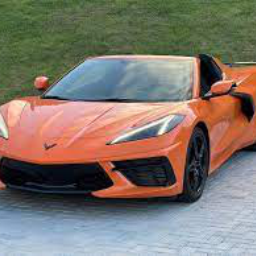

In [26]:
from torchvision import transforms
composed = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(256)
])

# carrega a imagem do notebook
image_pil = composed(Image.open("corvette.jpeg"))
image_pil

# CLIP vai reconhecer o carro baseado no texto

In [22]:
possible_classes = [
 "this car is a honda civic",
 "this car is a lamborgini",
 "this car is a corvette",
 "this car is a f40 ferrari",
]

image = preprocess(image_pil).unsqueeze(0).to(device)
text = clip.tokenize(possible_classes).to(device)

with torch.no_grad():
  image_features = model.encode_image(image)
  text_features = model.encode_text(text)

  logits_per_image, logits_per_text = model(image, text)
  probs = logits_per_image.softmax(dim=-1).cpu().numpy()

format_preds(probs[0], possible_classes)

0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-this car is a honda civic0.00533-th

# CLIP vai avaliar as classes do texto

In [20]:
possible_classes = [
 "this is a boat",
 "this is a car",
 "this is a airplane"
]

image = preprocess(image_pil).unsqueeze(0).to(device)
text = clip.tokenize(possible_classes).to(device)

with torch.no_grad():
  image_features = model.encode_image(image)
  text_features = model.encode_text(text)

  logits_per_image, logits_per_text = model(image, text)
  probs = logits_per_image.softmax(dim=-1).cpu().numpy()

format_preds(probs[0], possible_classes)

0.00199-this is a boat
0.99477-this is a car
0.00324-this is a airplane


# Prever pela cor do objeto

In [30]:
possible_classes = [
 "this car is blue",
 "this is a orange corvette",
 "this is a red corvette",
 "the car is yellow car", 
 "this car is orange corvette", 
 "the bike is orange"
]

image = preprocess(image_pil).unsqueeze(0).to(device)
text = clip.tokenize(possible_classes).to(device)

with torch.no_grad():
  image_features = model.encode_image(image)
  text_features = model.encode_text(text)

  logits_per_image, logits_per_text = model(image, text)
  probs = logits_per_image.softmax(dim=-1).cpu().numpy()

format_preds(probs[0], possible_classes)

0.00009-this car is blue
0.58255-this is a orange corvette
0.00482-this is a red corvette
0.00017-the car is yellow car
0.41216-this car is orange corvette
0.00021-the bike is orange
